# PGOP Example

## Introduction

This example demonstrates the application of Point group order parameter (PGOP) to a Lennard-Jones (LJ) system at density of 1 and temperature of 0.8 in reduced units. The trajectory for this analysis was generated using HOOMD-blue and dupin ([HOOMD-blue](https://hoomd-blue.readthedocs.io/), [dupin](https://github.com/glotzerlab/dupin)), which provided a highly time-resolved (every frame is spaced 20 time steps apart) subtrajectory of a rare event—specifically, nucleation in the LJ system. You can read more on this in dupin documentation ([link](https://dupin.readthedocs.io/en/latest/index.html)). Our objective is to analyze this trajectory to evaluate the evolution of symmetry within the environments captured. 

### Identifying Relevant Point Groups

First, we should determine the point groups of interest for PGOP. For systems with unknown crystal structures, it is possible to compute the complete set of crystallographic point group symmetries to identify those present. However, for the LJ system, prior knowledge indicates that the target crystals are relatively simple (BCC, FCC and HCP), characterized by a single Wyckoff site symmetry. Specifically, BCC and FCC crystal exhibit $\mathrm{O_h}$ point group symmetry, while HCP crystals possess $\mathrm{D_{3h}}$ point group symmetry. Consequently, this analysis focuses on these two point groups. 

To ascertain the point group symmetry of particles within a crystal, one should consult the crystallographic literature. Several comprehensive resources for crystal prototypes exist, such as AFLOW ([AFLOW](https://aflow.org/)). A crystal’s symmetry is defined by its space group, which encompasses both translational and point group symmetries. Each particle in the unit cell is assigned a Wyckoff site designation. To link this designation to a specific point group symmetry, crystallographic tables should be consulted ([IUCr Tables](https://onlinelibrary.wiley.com/iucr/itc/Ac/contents/)).

Within these tables, the space group of the crystal should be identified. Under the "Positions" section, Wyckoff sites are listed (e.g., 2c), accompanied by the associated point group symmetry in Hermann-Mauguin notation. PGOP can interpret both Schönflies and Hermann-Mauguin notations for point group designations. For translation between the two systems, [this Wikipedia page](https://en.wikipedia.org/wiki/Hermann%E2%80%93Mauguin_notation) serves as a useful reference. For systems incorporating non-crystallographic symmetries, such as quasicrystals, Hermann-Mauguin notation may be inadequate, and Schönflies notation can be used instead.

### Example: HCP Crystal

As documented by AFLOW, the HCP structure comprises two unique atomic sites, both designated as Wyckoff position 2c ([AFLOW example](https://aflow.org/p/A_hP2_194_c-001/)) within space group 194. According to the crystallographic tables for this space group ([IUCr Tables for 194](https://onlinelibrary.wiley.com/iucr/itc/Ac/ch2o3v0001/sgtable2o3o194/)), the 2c site exhibits symmetry –$6m2$, which corresponds to $\mathrm{D_{3h}}$ as noted in [Wikipedia](https://en.wikipedia.org/wiki/Hermann%E2%80%93Mauguin_notation).

## Simple example
To begin, let us first consider ideal simple crystals such as SC, BCC, FCC and HCP and
let us attempt to compute their PGOP values.

In [1]:
import warnings

warnings.filterwarnings("ignore")
import freud
import numpy as np

import spatula

crystal_systems = {}
# create crystal systems
crystal_systems["sc"] = freud.data.UnitCell.sc().generate_system(3)
crystal_systems["bcc"] = freud.data.UnitCell.bcc().generate_system(3)
crystal_systems["fcc"] = freud.data.UnitCell.fcc().generate_system(3)
crystal_systems["hcp"] = freud.data.UnitCell(
    freud.box.Box.from_box_lengths_and_angles(
        1, 1, 2 * np.sqrt(6) / 3, np.pi / 2, np.pi / 2, 2 * np.pi / 3
    ),
    [[0, 0, 0], [2 / 3, 1 / 3, 1 / 2]],
).generate_system(3)

crystal_symmetries = {"sc": "Oh", "bcc": "Oh", "fcc": "Oh", "hcp": "D3h"}
# make an optimizer for PGOP
optimizer = spatula.optimize.Union.with_step_gradient_descent(
    spatula.optimize.Mesh.from_grid()
)
sigma = 0.0675
# create pgop object that computes both symmetries
pgop_compute = spatula.PGOP(symmetries=["Oh", "D3h"], optimizer=optimizer)
# symmetry ordering for printing
symmetry_order = {"Oh": 0, "D3h": 1}
perfect_crystal = {}
for crystal in crystal_systems:
    # compute pgop for each system
    pgop_compute.compute(
        crystal_systems[crystal], sigma, {"r_max": 1.1, "exclude_ii": True}
    )
    # Print the mean order parameter for the correct symmetry for each crystal.
    mean_order = np.mean(
        pgop_compute.order[:, symmetry_order[crystal_symmetries[crystal]]]
    )
    perfect_crystal[crystal] = np.mean(pgop_compute.order, axis=0)
    print(
        f"{crystal} crystal, PGOP for {crystal_symmetries[crystal]} symmetry: {mean_order}"
    )

sc crystal, PGOP for Oh symmetry: 0.9999999999984259
bcc crystal, PGOP for Oh symmetry: 0.9999999999922073
fcc crystal, PGOP for Oh symmetry: 0.9999999999939434
hcp crystal, PGOP for D3h symmetry: 0.999999999989589


## Perfect crystals with noise

Next, let us attempt to try and separate the structures of these local environments
within all these crystals when we add gaussian noise.

sc
bcc
fcc
hcp


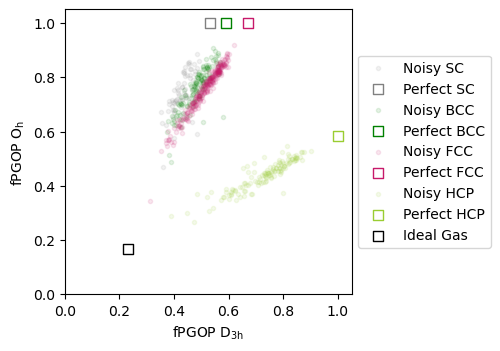

In [ ]:
import matplotlib.pyplot as plt

crystal_systems_with_noise = {}
crystal_colors_single = {
    "fcc": "#c7196a",
    "bcc": "green",
    "sc": "gray",
    "hcp": "yellowgreen",
}
# crystal noise
S = 0.03
# create crystal systems
crystal_systems_with_noise["sc"] = freud.data.UnitCell.sc().generate_system(
    4, sigma_noise=S
)
crystal_systems_with_noise["bcc"] = freud.data.UnitCell.bcc().generate_system(
    4, sigma_noise=S
)
crystal_systems_with_noise["fcc"] = freud.data.UnitCell.fcc().generate_system(
    4, sigma_noise=S
)
crystal_systems_with_noise["hcp"] = freud.data.UnitCell(
    freud.box.Box.from_box_lengths_and_angles(
        1, 1, 2 * np.sqrt(6) / 3, np.pi / 2, np.pi / 2, 2 * np.pi / 3
    ),
    [[0, 0, 0], [2 / 3, 1 / 3, 1 / 2]],
).generate_system(4, sigma_noise=S)

crystal_symmetries = {"sc": "Oh", "bcc": "Oh", "fcc": "Oh", "hcp": "D3h"}
# make an optimizer for PGOP
optimizer = spatula.optimize.Union.with_step_gradient_descent(
    spatula.optimize.Mesh.from_grid()
)
sigma = 0.0675
# create pgop object that computes both symmetries
pgop_compute = spatula.PGOP(symmetries=["Oh", "D3h"], optimizer=optimizer)
# symmetry ordering for printing
symmetry_order = {"Oh": 0, "D3h": 1}
noisy_crystal = {}
for crystal in crystal_systems:
    # compute pgop for each system
    pgop_compute.compute(
        crystal_systems_with_noise[crystal], sigma, {"r_max": 1.1, "exclude_ii": True}
    )
    noisy_crystal[crystal] = pgop_compute.order
ideal_gas_system = freud.data.make_random_system(4, 256)
pgop_compute.compute(ideal_gas_system, sigma, {"r_max": 1.1, "exclude_ii": True})
ideal_gas_coordinate = np.mean(pgop_compute.order, axis=0)
fig, ax = plt.subplots(figsize=(3.7, 3.7))
# Define grid for contour
x_min, x_max = 0, 1
y_min, y_max = 0, 1

for crystal in perfect_crystal:
    print(crystal)
    x = np.array(noisy_crystal[crystal][:, 1])
    y = np.array(noisy_crystal[crystal][:, 0])
    ax.scatter(
        x,
        y,
        marker=".",
        c=crystal_colors_single[crystal],
        label=f"Noisy {crystal.upper()}",
        alpha=0.1,
    )
    ax.set_xlim(0, 1.05)
    ax.set_ylim(0, 1.05)
    ax.scatter(
        perfect_crystal[crystal][1],
        perfect_crystal[crystal][0],
        label=f"Perfect {crystal.upper()}",
        edgecolors=crystal_colors_single[crystal],
        marker="s",
        s=50,
        facecolors="white",
    )
ax.scatter(
    ideal_gas_coordinate[1],
    ideal_gas_coordinate[0],
    label="Ideal Gas",
    edgecolors="black",
    marker="s",
    s=50,
    facecolors="white",
)
ax.set_xlabel(r"fPGOP $\mathregular{D_{3h}}$")
ax.set_ylabel(r"fPGOP $\mathregular{O_h}$")
# plot legend outside of plot
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

## LJ nucleation analysis

Now let us analyze the promised nucleation subtrajectory of LJ system. First step is to
compute the value of the order parameter for every particle in every frame. This might
take a while.

In [3]:
import gsd.hoomd

# make an optimizer for PGOP
optimizer = spatula.optimize.Union.with_step_gradient_descent(
    spatula.optimize.Mesh.from_grid()
)
sigma = 0.0675
# create pgop object that computes both symmetries
pgop_compute = spatula.PGOP(symmetries=["Oh", "D3h"], optimizer=optimizer)
PGOP_values = []
with gsd.hoomd.open("nucleation.gsd") as f:
    for frame in f:
        pgop_compute.compute(
            (frame.configuration.box, frame.particles.position),
            sigma,
            {"r_max": 1.1, "exclude_ii": True},
        )
        PGOP_values.append(pgop_compute.order)

Let us plot the progression of the mean values for each frame as the simplest example.

52
52


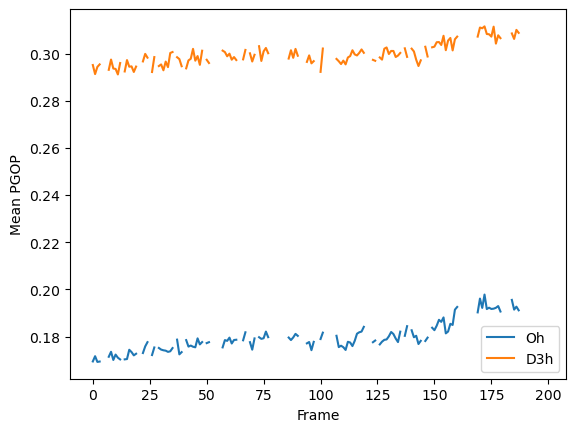

In [8]:
mean_Oh = np.mean(np.array(PGOP_values)[:, :, symmetry_order["Oh"]], axis=1)
mean_D3h = np.mean(np.array(PGOP_values)[:, :, symmetry_order["D3h"]], axis=1)
import matplotlib.pyplot as plt

plt.plot(mean_Oh, label="Oh")
plt.plot(mean_D3h, label="D3h")
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Mean PGOP")
plt.show()

## Detailed per-particle analysis
The true power of PGOP lies in the fact that it is a per-particle order parameter, which
enables us to quantify the development of particle environments as a function of time
for key particles during nucleation.


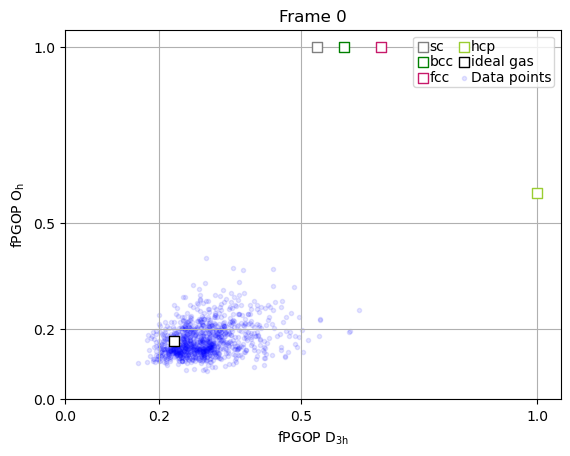

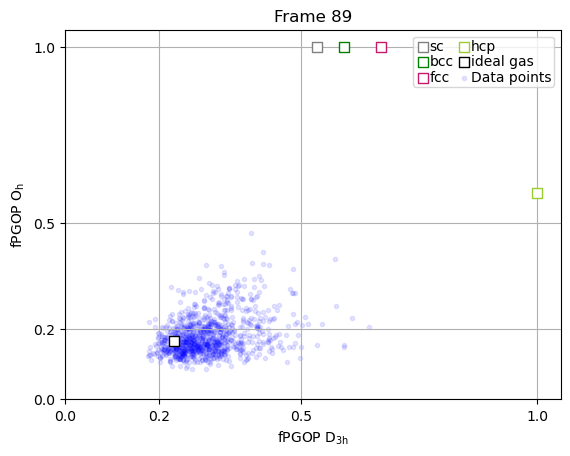

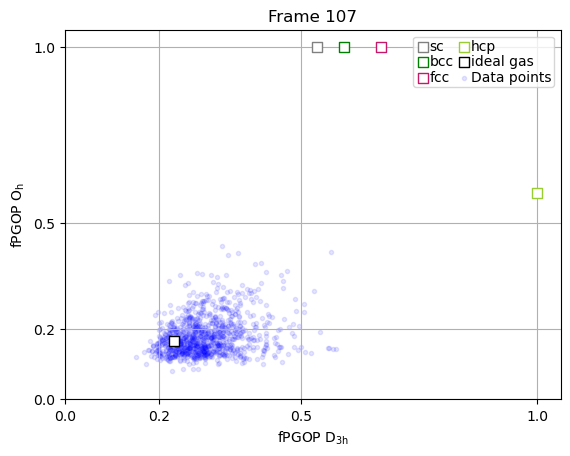

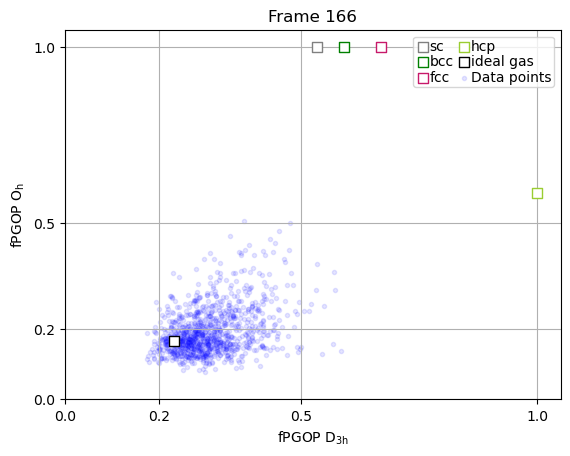

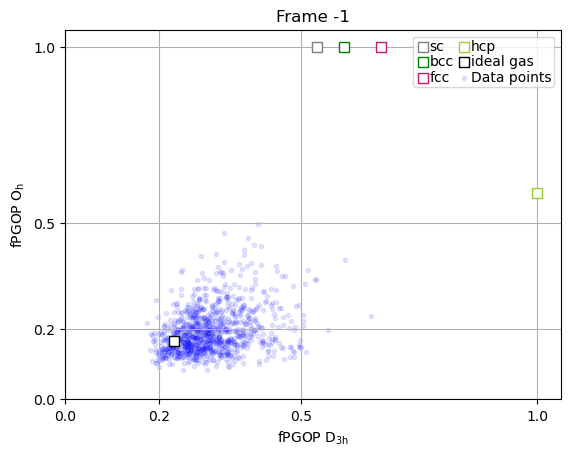

In [18]:
frames_to_plot = [0, 89, 107, 166, -1]
for ii in frames_to_plot:
    x = np.array(PGOP_values[ii][:, 1])
    y = np.array(PGOP_values[ii][:, 0])
    fig, ax = plt.subplots()
    for crystal in perfect_crystal:
        ax.scatter(
            perfect_crystal[crystal][1],
            perfect_crystal[crystal][0],
            label=crystal,
            marker="s",
            edgecolors=crystal_colors_single[crystal],
            s=50,
            facecolors="white",
            zorder=10000,
        )
    ax.scatter(
        ideal_gas_coordinate[1],
        ideal_gas_coordinate[0],
        label="ideal gas",
        marker="s",
        edgecolors="black",
        s=50,
        facecolors="white",
        zorder=10000,
    )
    # set title to be frame number
    ax.set_title(f"Frame {ii}")
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_yticks([0.0, 0.2, 0.5, 1.0])
    ax.set_xticks([0.0, 0.2, 0.5, 1.0])
    ax.set_xlabel(r"fPGOP $\mathregular{D_{3h}}$")
    ax.set_ylabel(r"fPGOP $\mathregular{O_h}$")
    # Initialize dynamic scatter plot for data points
    # We'll initialize with empty data; it will be updated in the animation
    ax.scatter(x, y, marker=".", c="blue", alpha=0.1)
    #  add legend entry for scatter plot
    ax.scatter([], [], marker=".", c="blue", alpha=0.1, label="Data points")
    ax.set_xlim(0, 1.05)
    ax.set_ylim(0, 1.05)
    ax.legend(
        ncol=2,
        handletextpad=0,
        columnspacing=0.2,
        handlelength=1,
        labelspacing=0.1,
        borderpad=0.2,
    )
    ax.grid(True)